<a href="https://colab.research.google.com/github/abdalkarimnourddine/python-tutorial/blob/master/project%20heart%20disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing 
import matplotlib
import keras
import scipy.optimize as opt 
import statsmodels.api as sm 


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [ ]:

# read the csv
pd = pd.read_excel('/content/heart2.xlsx')


In [ ]:
pd.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,57,1,4,110,335,0,0,143,1,3.0,2,1,7,1
281,47,1,3,130,253,0,0,179,0,0.0,1,0,3,0
282,55,0,4,128,205,0,1,130,1,2.0,2,1,7,1
283,35,1,2,122,192,0,0,174,0,0.0,1,0,3,0
284,61,1,4,148,203,0,0,161,0,0.0,1,1,7,1
285,58,1,4,114,318,0,1,140,0,4.4,3,3,6,1
286,58,0,4,170,225,1,2,146,1,2.8,2,2,6,1
287,58,1,2,125,220,0,0,144,0,0.4,2,?,7,0
288,56,1,2,130,221,0,2,163,0,0.0,1,0,7,0
289,56,1,2,120,240,0,0,169,0,0.0,3,0,3,0


In [ ]:
df = pd[~pd.isin(['?'])]
df.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,57,1,4,110,335,0,0,143,1,3.0,2,1,7,1
281,47,1,3,130,253,0,0,179,0,0.0,1,0,3,0
282,55,0,4,128,205,0,1,130,1,2.0,2,1,7,1
283,35,1,2,122,192,0,0,174,0,0.0,1,0,3,0
284,61,1,4,148,203,0,0,161,0,0.0,1,1,7,1
285,58,1,4,114,318,0,1,140,0,4.4,3,3,6,1
286,58,0,4,170,225,1,2,146,1,2.8,2,2,6,1
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7,0
288,56,1,2,130,221,0,2,163,0,0.0,1,0,7,0
289,56,1,2,120,240,0,0,169,0,0.0,3,0,3,0


In [ ]:
df= df.dropna(axis=0)
df.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,57,1,4,110,335,0,0,143,1,3.0,2,1,7,1
281,47,1,3,130,253,0,0,179,0,0.0,1,0,3,0
282,55,0,4,128,205,0,1,130,1,2.0,2,1,7,1
283,35,1,2,122,192,0,0,174,0,0.0,1,0,3,0
284,61,1,4,148,203,0,0,161,0,0.0,1,1,7,1
285,58,1,4,114,318,0,1,140,0,4.4,3,3,6,1
286,58,0,4,170,225,1,2,146,1,2.8,2,2,6,1
288,56,1,2,130,221,0,2,163,0,0.0,1,0,7,0
289,56,1,2,120,240,0,0,169,0,0.0,3,0,3,0
290,67,1,3,152,212,0,2,150,0,0.8,2,0,7,1


In [ ]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  target    297 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 44.8+ KB


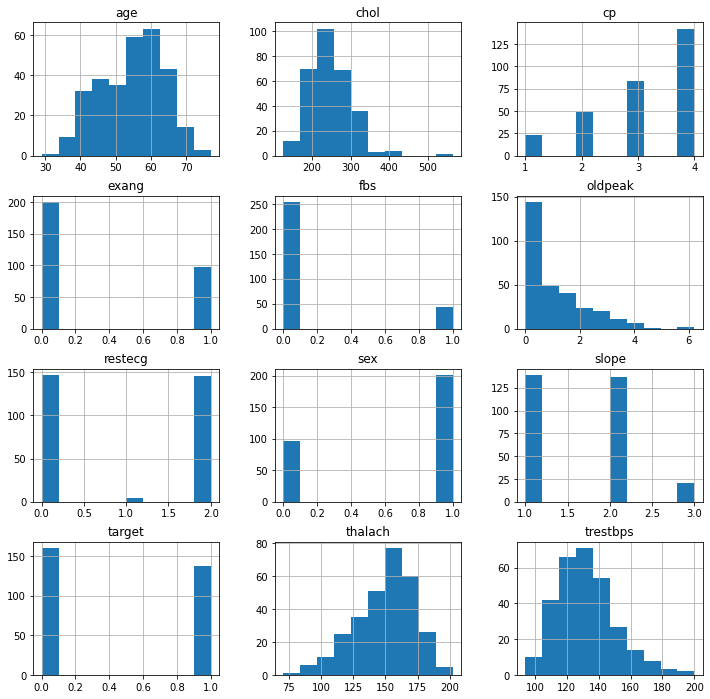

In [ ]:
# plot histograms for each variable
df.hist(figsize = (12, 12))
plt.show()

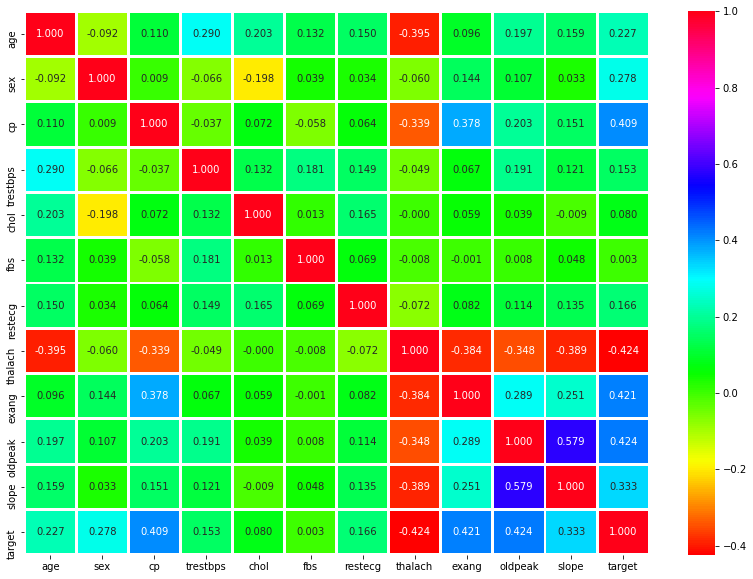

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

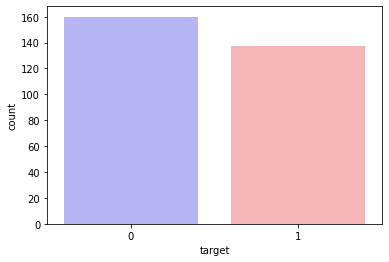

In [ ]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

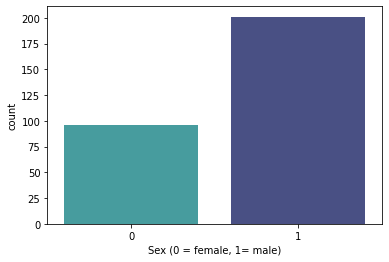

In [ ]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [ ]:
from sklearn import model_selection

X = np.array(df.drop(['target'], 1))
y = np.array(df['target'])
X = preprocessing.MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                224       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# fit the binary model on the training data
history=binary_model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=50, batch_size=10)

Train on 237 samples, validate on 60 samples
Epoch 1/50
237/237 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.6245 - val_loss: 0.6891 - val_accuracy: 0.7833
Epoch 2/50
237/237 [==============================] - 0s 159us/step - loss: 0.6858 - accuracy: 0.6878 - val_loss: 0.6825 - val_accuracy: 0.8000
Epoch 3/50
237/237 [==============================] - 0s 156us/step - loss: 0.6766 - accuracy: 0.7300 - val_loss: 0.6719 - val_accuracy: 0.8500
Epoch 4/50
237/237 [==============================] - 0s 160us/step - loss: 0.6639 - accuracy: 0.7764 - val_loss: 0.6572 - val_accuracy: 0.8500
Epoch 5/50
237/237 [==============================] - 0s 187us/step - loss: 0.6563 - accuracy: 0.7426 - val_loss: 0.6415 - val_accuracy: 0.8667
Epoch 6/50
237/237 [==============================] - 0s 156us/step - loss: 0.6337 - accuracy: 0.7722 - val_loss: 0.6218 - val_accuracy: 0.8667
Epoch 7/50
237/237 [==============================] - 0s 164us/step - loss: 0.6189 - accuracy

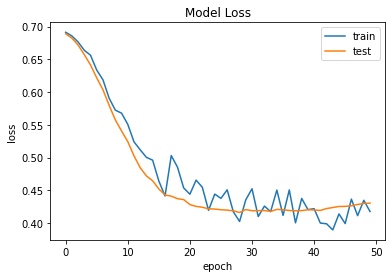

In [ ]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

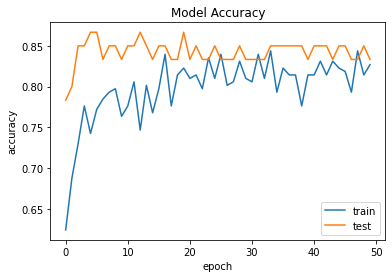

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

accuracy of the model:  0.8333333333333334


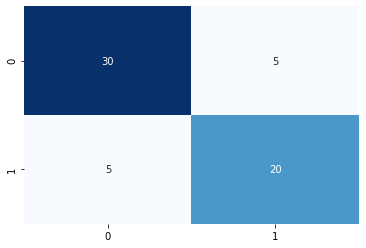

In [ ]:
y_pred = binary_model.predict(X_test)
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred.round())
print('accuracy of the model: ',ac)

0.8662857142857143

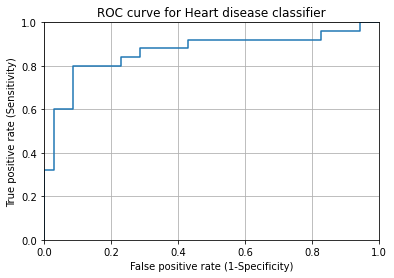

In [ ]:
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
metrics.auc(fpr,tpr)


In [ ]:
%matplotlib inline
def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
plotting(y_test,rdf_c.predict_proba(X_test))
plt.figure() 

NameError: ignored